### install if running first time.


In [27]:
# !pip install pyfolio
# !pip install zipline

In [28]:
import pyfolio as pf
%matplotlib inline

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
from dotenv import load_dotenv
from datetime import date
import warnings

# from MCForecastTools import MCSimulation

In [29]:
def read_data ():
    #read data from local file
    #Read the census data into a Pandas DataFrame
    file_path = Path("./gold_btc.csv")
    
    gold_btc_df = pd.read_csv(file_path,parse_dates=True, infer_datetime_format=True).dropna()
    # gold_btc_df = pd.read_csv(file_path).dropna()
    gold_btc_df['GLD'] = gold_btc_df['GLD'].astype(float)
    gold_btc_df['BTC'] = gold_btc_df['BTC'].astype(float)
    gold_btc_df.columns =  ['date', 'GLD', 'BTC']
    gold_btc_df.set_index ('date', inplace = True)
    return gold_btc_df
#     gold_btc_df.head(5)

In [30]:
def get_ser_data(in_tick):
    #routine to read data from csv and convert into serial data
    raw_data_df = read_data ()
    tic_ser = raw_data_df[in_tick].pct_change().dropna()
    tic_ser.index = pd.to_datetime(tic_ser.index)
    return tic_ser
    #test_sr = spy_price_pct_ser.copy().dropna()
    #test_sr.index = pd.to_datetime(test_sr.index.date)
    #test_sr.index   
    
    #convert t

In [31]:
def show_tear_sheet (in_tick = 'GLD'):
    #show the tear sheet for either gold or bitcoin
    #get the data for the ticker
    tic_ser = get_ser_data (in_tick)
    # silence warnings
    warnings.filterwarnings('ignore')
    #displayit
    pf.create_full_tear_sheet(tic_ser)

Start date,2017-05-19
End date,2021-03-31
Total months,46
,Backtest
Annual return,145.8%
Cumulative returns,3119.8%
Annual volatility,69.2%
Sharpe ratio,1.65
Calmar ratio,1.76
Stability,0.44
Max drawdown,-82.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,82.73,2017-12-18,2018-12-14,2020-11-24,767
1,29.00,2017-09-01,2017-09-15,2017-10-10,28
2,27.43,2017-06-06,2017-07-17,2017-08-07,45
3,21.76,2021-01-08,2021-01-27,2021-02-08,22
4,14.71,2021-02-22,2021-02-26,2021-03-10,13


Stress Events,mean,min,max
New Normal,0.45%,-20.57%,20.25%


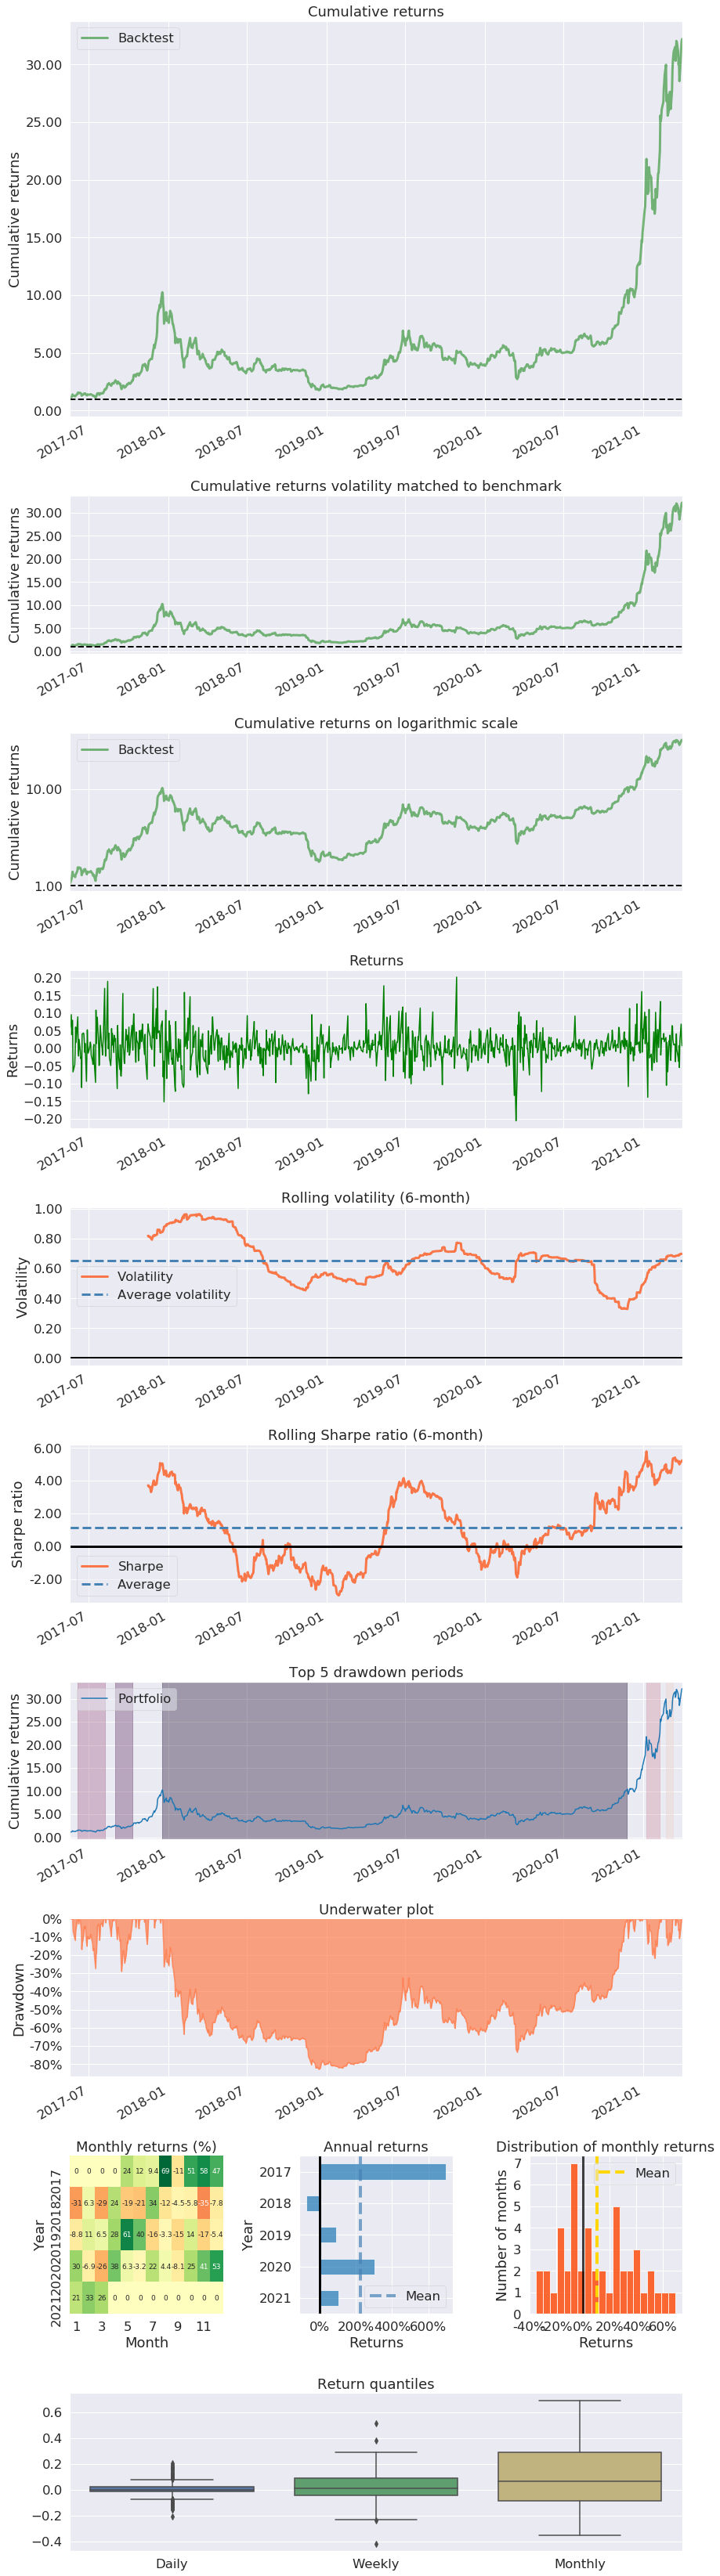

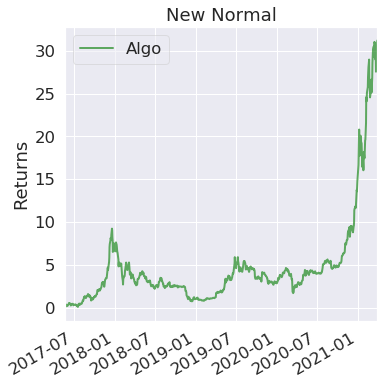

In [32]:
show_tear_sheet('BTC')